In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('all_data.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
df.shape

(186850, 6)

In [7]:
## checking for null values..
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<AxesSubplot:>

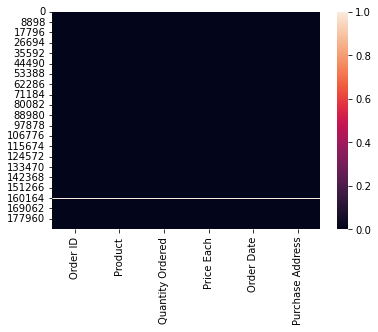

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
## checking for duplicate entries..
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/2019 16:52,"970 Sunset St, Austin, TX 73301"
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1735,297311,Bose SoundSport Headphones,1,99.99,12/7/2019 7:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/4/2019 15:57,"482 8th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
185715,247075,USB-C Charging Cable,1,11.95,8/10/2019 19:18,"213 Main St, New York City, NY 10001"
185843,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186345,247673,USB-C Charging Cable,1,11.95,8/19/2019 19:27,"600 River St, San Francisco, CA 94016"
186550,247868,34in Ultrawide Monitor,1,379.99,8/19/2019 7:39,"151 Willow St, New York City, NY 10001"


In [12]:
## removing duplicate entries..
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(185687, 6)

In [14]:
df['Order ID'].nunique()

178438

In [15]:
## This column does not contain only unique features and that is why it can not be used as index of this dataframe..
## Multiple products can have same order id if they are ordered together..Do not need to drop it but it is not a useful feature..
## We will convert it into numeric data..

In [16]:
df[df['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
df.drop(index=254,axis=0,inplace=True)

In [18]:
df['Order ID']=df['Order ID'].astype('int64')

In [19]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')

In [20]:
df['Price Each']=df['Price Each'].astype('float64')

In [21]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [23]:
#df.to_csv('gadget_data.csv',index=False)

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [30]:
df['Order Date'].dt.year.value_counts()

2019    185652
2020        34
Name: Order Date, dtype: int64

In [37]:
df[df['Order Date'].dt.year==2019]['Price Each'].sum()

34254139.07

In [38]:
df[df['Order Date'].dt.year==2020]['Price Each'].sum()

8503.4

In [39]:
df[df['Order Date'].dt.year==2019]['Quantity Ordered'].sum()

208771

In [40]:
df[df['Order Date'].dt.year==2020]['Quantity Ordered'].sum()

41

In [41]:
df['Order Date'].dt.quarter

0         4
1         4
2         4
3         4
4         4
         ..
186845    3
186846    3
186847    3
186848    3
186849    3
Name: Order Date, Length: 185686, dtype: int64